# Questionnaire of How People Learning Project

In [1]:
from sympy import *
from sympy import symbols
import holoviews as hv 
from holoviews import streams
from holoviews import opts
import numpy as np
from ipywidgets import interact, widgets,HBox
from IPython.display import display
from holoviews.streams import Stream, param
from IPython.core.display import display, HTML
from ipywidgets import interact, widgets,HBox, Layout,Label
import ipywidgets as widgets
from sympy.parsing.sympy_parser import parse_expr
init_printing(use_unicode=True)
from scipy.spatial import distance_matrix
from IPython.display import Image
from save import *
from IPython.display import display
from IPython.display import Markdown
np.seterr(divide='ignore', invalid='ignore')

mode = 0 # if mode = 1, all text boxes should be filled
         # else the text box can be empty

# put the save function in the front
def saveAll(list_slider):
    response_list = {}
    for k, v in list_slider.items():
        response_list[k] = v.get_state()['value']
        if response_list[k] == '' and mode:
            print('You need to response to Q{}'.format(k))
            return
        elif response_list[k] == '' and not mode:
            response_list[k] = 'EMPTY'
            
    readAndSave(response_list)
    return

## Part1: Textual Description

In [2]:
a, b, r = symbols("a b r")
lennardJones = a/r**12 - b/r**6
force = -lennardJones.diff(r)

rMin = symbols('rMin')
equationDistanceMinimum = Eq(force.subs({r: rMin}) / rMin, 0)
eMin = symbols('eMin')
equationEnergieMinimum = Eq(lennardJones.subs({r:rMin}), -eMin)
criticalPointSolutions = solve([equationDistanceMinimum, equationEnergieMinimum], a, b)
lennardJonesCritical = lennardJones.subs(criticalPointSolutions)
lennardJonesScaled = expand(lennardJonesCritical / eMin)

list_formulas = {
    '1': Markdown('**equationDistanceMinimum:**'),
    '2': Markdown('**equationEnergieMinimum:**'),
    '3': Markdown('**criticalPointSolutions:**'),
    '4': Markdown('**lennardJonesCritical:**'),
    '5': Markdown('**lennardJonesScaled:**')
}

list_functions = {
    '1': equationDistanceMinimum,
    '2': equationEnergieMinimum,
    '3': criticalPointSolutions,
    '4': lennardJonesCritical,
    '5': lennardJonesScaled
}
rho = symbols('rho')
energy = expand(lennardJonesScaled.subs({r: rho * rMin}))
forceScaled = expand(energy.diff(rho))

energyAttractive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
energyRepulsive = expand(lennardJonesScaled.subs({r: rho * rMin})).as_terms()[0][0][0]
forceScaledAttractive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][1][0]
forceScaledRepulsive = expand(forceScaled.subs({r: rho * rMin})).as_terms()[0][0][0]

list_formulas2 = {
    '1': Markdown('**energyAttractive:**'),
    '2': Markdown('**energyRepulsive:**'),
    '3': Markdown('**forceScaledAttractive:**'),
    '4': Markdown('**forceScaledRepulsive:**')
}

list_functions2 = {
    '1': energyAttractive,
    '2': equationEnergieMinimum,
    '3': criticalPointSolutions,
    '4': lennardJonesCritical
}

parabolaApproximation = series(energy, rho, n=3, x0=1).removeO()
cubicApproximation = series(energy, rho, n=4, x0=1).removeO()
t, mu = symbols("t mu")
fEqualsMA = Eq(mu*rho(t).diff(t,2)-12/(rho(t)**13)+12/(rho(t)**7))
#charateristicPeriod = 2*np.pi/np.sqrt(72)

list_formulas3 = {
    '1': Markdown('**parabolaApproximation:**'),
    '2': Markdown('**cubicApproximation:**'),
    '3': Markdown('**fEqualsMA:**')
}

list_functions3 = {
    '1': parabolaApproximation,
    '2': cubicApproximation,
    '3': fEqualsMA
}


slider = lambda minimum, maximum: \
                widgets.IntSlider(
                    value=0,
                    min=minimum,
                    max=maximum,
                    step=1,
                    disabled=False,
                    continuous_update=False,
                    orientation='horizontal',
                    readout=True,
                    readout_format='d'
                )
text = lambda : \
            widgets.Text(
                placeholder='Type something',
                description="",
                disabled=False
            )


#### Le potentiel de Lennard-Jones

**lennardJones:**

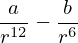

La force est la derivée (en 1D) du potentiel()

**force:**

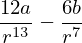

#### Le potentiel de Lennard-Jones normalisé

La résolution du système à deux équations permet de trouver l'expression de a et b en fonction de rmin et emin.

est une règle, i.e. r prend la valeur rMin

**equationDistanceMinimum:**

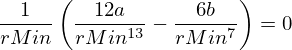

**equationEnergieMinimum:**

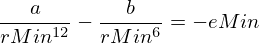

**criticalPointSolutions:**

**lennardJonesCritical:**

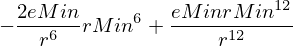

**lennardJonesScaled:**

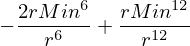

la fonction énergie est l' equivalent normalisé de l' expression initiale du potentiel de Lennard - Jones. L' énergie est exprimée par rapport à l' énergie minimale et rho la distance par rapport à la distance minimale.

**energy:**

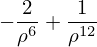

**forceScaled:**

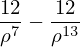

**energyAttractive:**

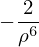

**energyRepulsive:**

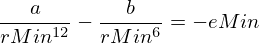

**forceScaledAttractive:**

**forceScaledRepulsive:**

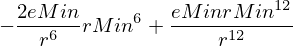

Le developpement en series entiere, i.e. expansion de Taylor, permet d' approximer la courbe avec une parabole ou un polynome cubique.

**parabolaApproximation:**

**cubicApproximation:**

**fEqualsMA:**

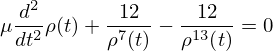

In [3]:
list_questions_1 = {
    '1.1': 'How well do the textual description and the corresponding equation help you fully understand the concepts?',
    '1.2': 'How well does the equation help you understand how the function changes in value when parameters change?',
    '1.3': 'How well can you understand the relationship between the force and potential with varying parameter?',
    '1.4': 'What did you understand from the given textual description and equation?',
    '1.5': 'Did you feel textual descriptions distracting in understanding?',
    '1.6': 'From the information given above, what can you comment on the nature of function?'
}

list_sliders_1 = {
    '1.1': slider(1,10),
    '1.2': slider(1,10),
    '1.3': slider(1,10),
    '1.4': text(),
    '1.5': text(),
    '1.6': text()
}
display(Markdown("#### Le potentiel de Lennard-Jones"))
display(Markdown('**lennardJones:**'),lennardJones)
display(Markdown("La force est la derivée (en 1D) du potentiel()"))
display(Markdown('**force:**'),force)
display(Markdown("#### Le potentiel de Lennard-Jones normalisé"))
display(Markdown("La résolution du système à deux équations permet de trouver l'expression de a et b en fonction de rmin et emin."))
display(Markdown("est une règle, i.e. r prend la valeur rMin"))
display(list_formulas['1'], list_functions['1'])
display(list_formulas['2'], list_functions['2'])
display(list_formulas['3'], list_functions['3'])
display(list_formulas['4'], list_functions['4'])
display(list_formulas['5'], list_functions['5'])
display(Markdown("la fonction énergie est l' equivalent normalisé de l' expression initiale du potentiel de Lennard - Jones. L' énergie est exprimée par rapport à l' énergie minimale et rho la distance par rapport à la distance minimale."))
display(Markdown('**energy:**'), energy)
display(Markdown('**forceScaled:**'), forceScaled)
display(list_formulas2['1'], list_functions2['1'])
display(list_formulas2['2'], list_functions2['2'])
display(list_formulas2['3'], list_functions2['3'])
display(list_formulas2['4'], list_functions2['4'])
display(Markdown("Le developpement en series entiere, i.e. expansion de Taylor, permet d' approximer la courbe avec une parabole ou un polynome cubique."))
display(list_formulas3['1'], list_functions3['1'])
display(list_formulas3['2'], list_functions3['2'])
display(list_formulas3['3'], list_functions3['3'])


display(HTML('<h2>Questions about textual description</h2> <H4>Scale is from LEAST -> 1 to 10 -> BEST OR STRONGLY DISAGREE to STRONGLY AGREE</H4>'))
display(HBox([Label(list_questions_1['1.1']), list_sliders_1['1.1']]))
display(HBox([Label(list_questions_1['1.2']), list_sliders_1['1.2']]))
display(HBox([Label(list_questions_1['1.3']), list_sliders_1['1.3']]))
display(HBox([Label(list_questions_1['1.4']), list_sliders_1['1.4']]))
display(HBox([Label(list_questions_1['1.5']), list_sliders_1['1.5']]))
display(HBox([Label(list_questions_1['1.6']), list_sliders_1['1.6']]))

## Part2: Static Plotting

In [4]:
list_questions_2 = {
    '2.1': 'How well does the static plot help you fully understand the concepts?',
    '2.2': 'How well does the static plot help you understand how the function changes in value when parameters change?',
    '2.3': 'After seeing the plot, how well can you understand the relation between force/potential and varying parameter?',
    '2.4': 'To which degree does the image matches with your understanding of 1.1, 1.2 and 1.3',
    '2.5': 'To which degree does the image helps you understand 1.1, 1.2 and 1.3 better?',
    '2.6': 'To which degree is the image helpful for your understanding ?',
    '2.7': 'After seeing the static plot, can you comment something new on the nature of the function?',
    '2.8': 'What did you understand from the given static plot?',
    '2.9': 'Did you feel static plot distracting in understanding?',
    '2.10': 'From the information given above, can you comment on the nature of function?'
}

list_sliders_2 = {
    '2.1': slider(1,10),
    '2.2': slider(1,10),
    '2.3': slider(1,10),
    '2.4': slider(1,10),
    '2.5': slider(-10,10),
    '2.6': slider(-10,10),
    '2.7': text(),
    '2.8': text(),
    '2.9': text(),
    '2.10': text()
}
display(HTML('<h2>Questions about static plot</h2> <H4>Scale is from LEAST -> 1 to 10 -> BEST OR STRONGLY DISAGREE to STRONGLY AGREE</H4>'))
text_description = 'This static plot depicts the four relationships shown as equations in last section, with parameters \u03B5 = 0.67, r = 1.031; please answer the following questions before proceeding to the next section.'
display(Image(url='plot/staticPlot.png'))
display(Markdown(text_description))
display(HBox([Label(list_questions_2['2.1']), list_sliders_2['2.1']]))
display(HBox([Label(list_questions_2['2.2']), list_sliders_2['2.2']]))
display(HBox([Label(list_questions_2['2.3']), list_sliders_2['2.3']]))
display(HBox([Label(list_questions_2['2.4']), list_sliders_2['2.4']]))
display(HBox([Label(list_questions_2['2.5']), list_sliders_2['2.5']]))
display(HBox([Label(list_questions_2['2.6']), list_sliders_2['2.6']]))
display(HBox([Label(list_questions_2['2.7']), list_sliders_2['2.7']]))
display(HBox([Label(list_questions_2['2.8']), list_sliders_2['2.8']]))
display(HBox([Label(list_questions_2['2.9']), list_sliders_2['2.9']]))
display(HBox([Label(list_questions_2['2.10']),list_sliders_2['2.10']]))

This static plot depicts the four relationships shown as equations in last section, with parameters ε = 0.67, r = 1.031; please answer the following questions before proceeding to the next section.

## Part3: Interactive Plotting

In [5]:
r,a,b = symbols('r a b')

lennardJones = a/r**12 - b/r**6; 
lennardJones
force = diff(lennardJones,r)
force

rMin , eMin = symbols('rMin eMin')
equationDistanceMinimum = force.subs(r,rMin)
#print(equationDistanceMinimum)
equationEnergieMinimum = lennardJones.subs(r,rMin) + eMin
#print(equationEnergieMinimum)
criticalPointSolutions = solve([equationEnergieMinimum,equationDistanceMinimum])
#print(criticalPointSolutions)

def substitute(var,critical_sol,equ):
    return equ.subs(var,critical_sol[0][var])

lennardJonesCritical = substitute(b,criticalPointSolutions,lennardJones)
lennardJonesCritical = substitute(a,criticalPointSolutions,lennardJonesCritical)
#print(lennardJonesCritical)
lennardJonesScaled = expand(lennardJonesCritical/eMin)
#print(lennardJonesScaled)


hv.extension('matplotlib')
approxLennardJonesWithUnits = lambda eps0, r0, r: -eps0 + (36 * (r - r0)**2 * eps0) / r0**2
approxForceWithUnits = lambda eps0, r0, r: (72 * (r - r0) * eps0) / r0**2
lennardJonesWithUnits = lambda eps0, r0, r: (-((2* r0**6)/r**6) + r0**12/r**12) * eps0
forceWithUnits = lambda eps0, r0, r: ((12 * r0**6)/r**7 - (12 * r0**12)/r**13) * eps0


def force_potential(eps0, r0):
    xs = np.linspace(0.5, 2, 1000)
    xDim = hv.Dimension('Distance Interatomique r')
    yDimEnergy = hv.Dimension('Energy Potentiellenormalisee E [KJ/mol]& Force F[N]',range = (-3,5))
    curve_approxLennardJonesWithUnits = hv.Curve((xs, approxLennardJonesWithUnits(r=xs, eps0=eps0, r0=r0)),label = 'Approximation parabolique du potentiel LJ').redim(y=yDimEnergy).redim(x =xDim).opts(color='red')
    curve_approxForceWithUnits = hv.Curve((xs, approxForceWithUnits(r=xs, eps0=eps0, r0=r0)),label = 'Force du potential approximé').redim(y=yDimEnergy).redim(x =xDim).opts(color='blue')
    curve_lennardJonesWithUnits = hv.Curve((xs, lennardJonesWithUnits(r=xs, eps0=eps0, r0=r0)),label = 'Potentiel de LJ').redim(y=yDimEnergy).redim(x =xDim).opts(color='green')
    curve_forceWithUnits = hv.Curve((xs, forceWithUnits(r=xs, eps0=eps0, r0=r0)),label = "Force LJ").redim(y=yDimEnergy).redim(x =xDim).opts(color='yellow')
    equ = hv.Text(1.75, 1, 'E = 72*($ε_0^2$)/($r_0^2$) = %.2f'%(72*eps0**2/r0**2))
    return curve_approxLennardJonesWithUnits * curve_approxForceWithUnits * curve_lennardJonesWithUnits * curve_forceWithUnits * equ

material_force_potential = hv.DynamicMap(force_potential, kdims=['eps0', 'r0']).redim.range(eps0=(.2, 5.), r0=(.7, 2.)).opts(legend_position='right')
display(HTML('<h2>Interact with the plot below and answer the following questions</h2>'))

radio_colors = widgets.RadioButtons(
    options=['yellow', 'blue', 'red','green'],
#     value='pineapple',
    description='',
    disabled=False
)

text_eps0 = widgets.Text(
    value='',
    placeholder='hint: try slider eps0',
    description='',
    disabled=False
)

text_r0 = widgets.Text(
    value='',
    placeholder='hint: try slider r0',
    description='',
    disabled=False
)


submit_interact = widgets.Button(
    description='Show Answers',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me'
)

def showAns(target):
    display(HTML('<p>Reference answers: Yellow; esp0=5; r0=0.8</p>'))
    return

submit_interact.on_click(showAns)
interact_q_text = {\
    'i.1':'Which color is the Force Plot?',
    'i.2':'What\'s the  value of eps0 in [0.2,5] such that the slope of Approx Parabolique is highest',
    'i.3':'What\'s the  value of r0 in [0.7,2] such that the minima of Force is at 0.8'
}

list_widgets_interaction = {\
                'i.1':radio_colors,
                'i.2':text_eps0,
                 'i.3':text_r0,
                'submit_interact_button':submit_interact
                    }
display(material_force_potential)
display(HBox([Label(interact_q_text['i.1']),radio_colors ])) 


display(HBox([Label(interact_q_text['i.2']),text_eps0 ]))  
display(HBox([Label(interact_q_text['i.3']),text_r0 ]))        
display(submit_interact)



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:DynamicMap   [eps0,r0]
   :Overlay
      .Curve.Approximation_parabolique_du_potentiel_LJ :Curve   [Distance Interatomique r]   (Energy Potentiellenormalisee E [KJ/mol]& Force F[N])
      .Curve.Force_du_potential_approximé              :Curve   [Distance Interatomique r]   (Energy Potentiellenormalisee E [KJ/mol]& Force F[N])
      .Curve.Potentiel_de_LJ                           :Curve   [Distance Interatomique r]   (Energy Potentiellenormalisee E [KJ/mol]& Force F[N])
      .Curve.Force_LJ                                  :Curve   [Distance Interatomique r]   (Energy Potentiellenormalisee E [KJ/mol]& Force F[N])
      .Text.I                                          :Text   [x,y]

Button(button_style='info', description='Show Answers', style=ButtonStyle(), tooltip='Click me')

In [6]:
options_list =['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
numerical_Scale = ['1','2','3','4','5']
list_sliders_3 = {}
def genSlider(q_num, scale = 'agree'):
    def_val = 3
    scaleList = options_list
    if (not(scale == 'agree')):
        scaleList = numerical_Scale
        def_val = 3
    
        
    slider = widgets.IntSlider(
                    value=0,
                    min=1,
                    max=10,
                    step=1,
                    disabled=False,
                    continuous_update=False,
                    orientation='horizontal',
                    readout=True,
                    readout_format='d'
                )
    list_sliders_3[q_num] = slider
    return slider

def gentext(q_num,hint_text='Response here'):
    scaleList = options_list
    text_this = widgets.Text(
    value='',
    placeholder=hint_text,
    description='',
    disabled=False
    )
    list_sliders_3[q_num] = text_this
    return text_this

list_questions_3={\
    '3.1':'How well does the interactive plot help you fully understand the concepts?',
    '3.2':'How well does the interactive plot help you understand how function changes in value when parameters change?',
    '3.3':'How well does the  interactive plot help you understand the relationship between the force with varying parameters?',
    '3.4':'The interactive plot matches with your prior understanding of the concepts ',
    '3.5':'The interactive plot matches with your prior understanding of how the Force, Potential functions would look like ?',
    '3.6':'The interactive plot matches with your prior understanding of how the Force, Potential functions vary with r0 , eps0 ?',
    '3.7':'The interactive plot helps you BETTER UNDERSTAND the concepts compared to just STATIC PLOT?',
    '3.8':'The interactive plot helps you BETTER UNDERSTAND how the Force, Potential functions would look like ?',
    '3.9': 'The interactive plot helps you BETTER UNDERSTANDhow the Force, Potential functions  would vary with r0 , eps0 ?',
    '3.10': 'To what degree is the interactive plot helful to you for understanding the concepts ?',
    '3.11':'Can you comment something about new which the interactive plot made you understand / realize ?',
    '3.12':'What did you dislike about the interactive plot?',
    '3.13': 'What interactions did you use the most and why ?',
    '3.14': 'What other interactions could have helped you better?'
}
display(HTML('<h2>Questions about interactive plot</h2> <H4>Scale is from LEAST -> 1 to 10 -> BEST OR STRONGLY DISAGREE to STRONGLY AGREE</H4>'))
display(HBox([Label(list_questions_3['3.1']),genSlider('3.1','no') ]))
display(HBox([Label(list_questions_3['3.2']),genSlider('3.2','no')]))
display(HBox([Label(list_questions_3['3.3']),genSlider('3.3','no')]))
display(HBox([Label(list_questions_3['3.4']),genSlider('3.4','agree')]))
display(HBox([Label(list_questions_3['3.5']),genSlider('3.5','agree')]))
display(HBox([Label(list_questions_3['3.6']),genSlider('3.6','agree')]))
display(HBox([Label(list_questions_3['3.7']),genSlider('3.7','agree')]))
display(HBox([Label(list_questions_3['3.8']),genSlider('3.8','agree')]))
display(HBox([Label(list_questions_3['3.9']),genSlider('3.9','agree')]))
display(HBox([Label(list_questions_3['3.10']),genSlider('3.10','NO')]))
display(HBox([Label(list_questions_3['3.11']),gentext('3.11')]))
display(HBox([Label(list_questions_3['3.12']),gentext('3.12')]))
display(HBox([Label(list_questions_3['3.13']),gentext('3.13')]))
display(HBox([Label(list_questions_3['3.14']),gentext('3.14')]))
display(HBox([Label(list_questions_3['3.11']),gentext('3.11')]))

submitButton = widgets.Button(
    description='Submit Response',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
list_sliders = {**list_sliders_1, **list_sliders_2, **list_sliders_3}
def saveResponse(target):
    saveAll(list_sliders)
submitButton.on_click(saveResponse)
submitButton

Button(button_style='success', description='Submit Response', icon='check', style=ButtonStyle(), tooltip='Clic…